## Mileage prediction using simple linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# import dataset
df = pd.read_csv('CarData.csv')

### Data Loading and Initial Exploration

In [3]:
# check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
# descriptive analysis
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
# sample data in the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Data Preprocessing

In [6]:
# dropping columns we don't plan on using
df = df.drop(columns=['cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin', 'name'], axis=1)

In [7]:
# checking for presence of null values in data
df.isna().sum()

mpg       0
weight    0
dtype: int64

### Data Visualization

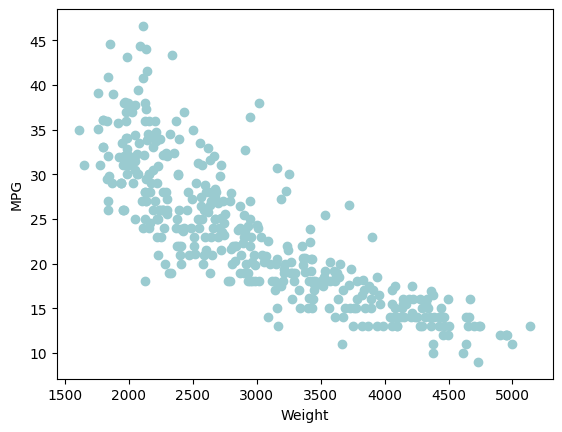

In [8]:
# scatter plot to see relationship between weight and mpg 
plt.scatter(x=df['weight'], y=df['mpg'], c="#9ACBD0")
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

### Preparing Data for Model Training

In [9]:
# splitting dataset into x and y for training purpose

# independent variable
x = df[['weight']]
# dependent variable
y = df['mpg']

In [10]:
# splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=66)

### Model Training and Evaluation

In [11]:
# initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# predict the target values for the test set
y_pred = model.predict(x_test)

In [13]:
# evaluate the model's performance using R-squared score

r2 = r2_score(y_test, y_pred)
print(f"R2 = {r2:.1f}")

R2 = 0.7


### Data Visualization: Regression Line

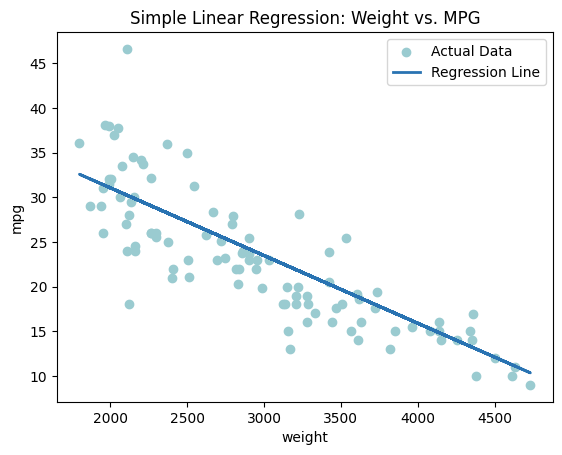

In [14]:
# plot scatter plot with the regression line
plt.scatter(x_test, y_test, color='#9ACBD0', label='Actual Data')
plt.plot(x_test, y_pred, color='#2973B2', label='Regression Line', linewidth=2)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()
plt.title('Simple Linear Regression: Weight vs. MPG')
plt.show()